In [1]:
import glob
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

OMP: Warning #181: OMP_STACKSIZE: ignored because KMP_STACKSIZE has been defined
OMP: Warning #181: GOMP_STACKSIZE: ignored because KMP_STACKSIZE has been defined


In [2]:
SM_SIZE = 10
MD_SIZE = 12
LG_SIZE = 16

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = MD_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

### Run RADEX for the same situation (100 K)

In [3]:
import pyradex
import os
os.environ['RADEX_DATAPATH'] = '/orange/adamginsburg/repos/pyradex/lamda/'
import matplotlib.pyplot as plt
from astroquery.lamda import Lamda
# import dask
# dask.config.set(scheduler = 'threads', num_workers = 8)
# from dask.diagnostics import ProgressBar
# ProgressBar().register()

ModuleNotFoundError: No module named 'pyradex'

In [4]:
ls /orange/adamginsburg/repos/pyradex/lamda/

ls: /orange/adamginsburg/repos/pyradex/lamda/: No such file or directory


In [9]:
# Get methanol A species results for given column, density, and temperature
set_column = 1e14
set_density = 1e5
set_temp = 50
rr = pyradex.Radex(species='ch3oh_a', column=set_column, density=set_density, temperature=set_temp)
tbl = rr()

/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/pyradex-0.4.2.dev0-py3.9.egg/pyradex/core.py:542: UserWarning: Using a default ortho-to-para ratio (which will only affect species for which independent ortho & para collision rates are given)
  warnings.warn("Using a default ortho-to-para ratio (which "
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/pyradex-0.4.2.dev0-py3.9.egg/pyradex/core.py:968: RuntimeWarning: invalid value encountered in true_divide
  frac_level_diff = level_diff/self.level_population
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/pyradex-0.4.2.dev0-py3.9.egg/pyradex/core.py:1056: RuntimeWarning: overflow encountered in exp
  bnutex = thc*xt/(np.exp(earg)-1.0)


In [10]:
# Which line is the dasar line?
np.argmax((tbl['upperlevel'] == b'3_1   ') & (tbl['lowerlevel'] == b'4_0   '))

62

In [11]:
tbl[62]

Tex,tau,frequency,upperstateenergy,upperlevel,lowerlevel,upperlevelpop,lowerlevelpop,brightness,T_B
K,,GHz,K,,,,,erg / (cm2 Hz s sr),K
float64,float64,float64,float64,bytes6,bytes6,float64,float64,float64,float64
1.3046936795972943,0.3458920073168159,107.013831,28.3,3_1,4_0,0.0027329811516297064,0.17991856934978337,-8.458739164652115e-16,-0.24041077989339263


In [12]:
radex_dens = np.geomspace(np.min(christian_tbl['dens']), np.max(christian_tbl['dens']), 20)
radex_coldens = np.geomspace(1e13, np.max(christian_tbl['coldens']), 20)
rslts = [[rr(density = {'H2':dens}, column = coldens, temperature = 100)[62]['Tex', 'tau', 'T_B'] for dens in radex_dens] for coldens in radex_coldens]

In [13]:
# radex_tex = [[l['Tex'] for l in r] for r in rslts] # I tried this and it was wrong: [l['Tex'] for r in rslts for l in r]
# radex_tau = [[l['tau'] for l in r] for r in rslts]
radex_T_B = [[l['T_B'] for l in r] for r in rslts]

-0.819132482178787 is the minimum, it doesn't actually go down to -1


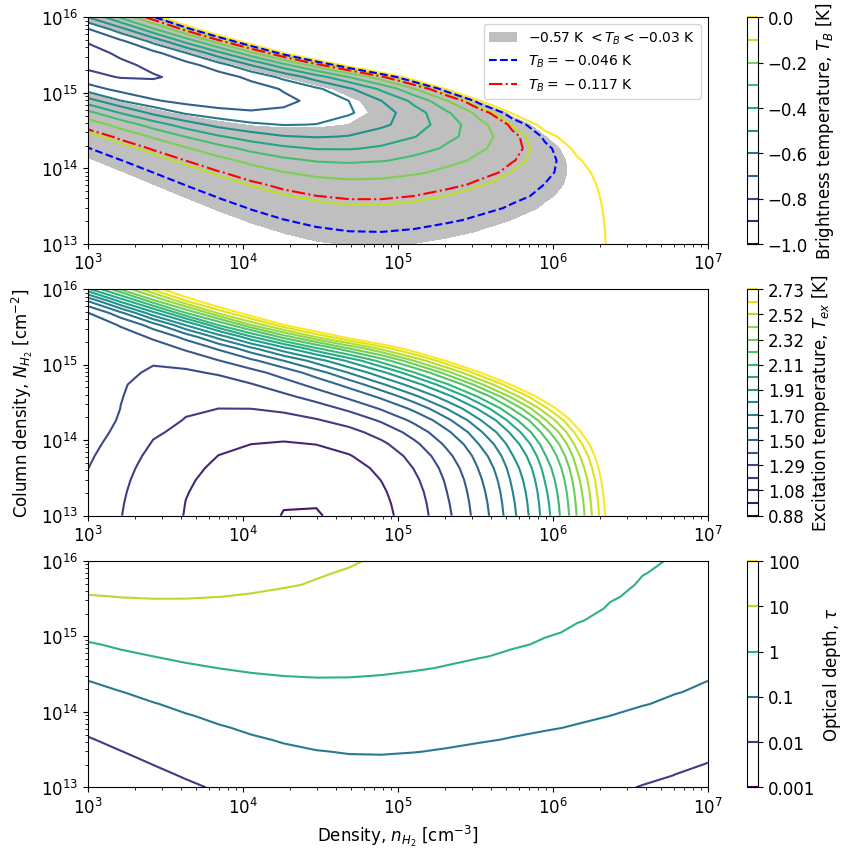

In [40]:
import matplotlib.colors as colors

the_best_colormap = 'viridis'

radex_dens, radex_dens_ids = np.unique(radex_dens, return_inverse=True) # This line doesn't work because I need to know which 
                                                                        # Tex map to which dens and coldens
radex_coldens, radex_coldens_ids = np.unique(radex_coldens, return_inverse=True)
radex_dens_grid, radex_coldens_grid = np.meshgrid(radex_dens, radex_coldens)

fig, ax = plt.subplots(1, 1, figsize = (10, 10))

cp = ax.contour(radex_dens_grid, radex_coldens_grid, radex_T_B, 
                  levels = -0.1, 
                  cmap = the_best_colormap, alpha = 1) #inferno
plt.colorbar(cp, ax = ax, label = r"Brightness temperature, $T_B$ [K]")

# plt.savefig('632e0742965a6e88270d73d7/figures/pyradex_results_redshift.pdf', bbox_inches = 'tight')
# plt.savefig('632e0742965a6e88270d73d7/figures/pyradex_results_redshift.png', dpi = 200, bbox_inches = 'tight')

# TEMPORARY FIGURES, FOR OFF HPG
# plt.savefig('pyradex_results_redshift.pdf', bbox_inches = 'tight')
# plt.savefig('pyradex_results_redshift.png', dpi = 200, bbox_inches = 'tight')

plt.show()